In [41]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("./data/train/train.csv")
test_data = pd.read_csv("./data/test/test.csv")
sample_submission = pd.read_csv("./data/test/sample_submission.csv")

# print(train_data.head())

In [42]:
# Prepare the data
X_train = train_data.drop(['Id', 'Pawpularity', 'Human', 'Action', 'Near', 'Collage', 'Eyes', 'Face', 'Info', 'Occlusion', 'Subject Focus'], axis=1)
X_test = test_data.drop(['Id', 'Human', 'Action', 'Near', 'Collage', 'Eyes', 'Face', 'Info', 'Occlusion', 'Subject Focus'], axis=1)
y_train = train_data['Pawpularity']
y_test = sample_submission['Pawpularity']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print(predictions)

[38.26252636 39.02661624 38.26252636 37.95746289 39.06100262 40.13015597
 37.19337301 36.08983328]


Pawpularity    1.000000
Group          0.016469
Accessory      0.013287
Blur          -0.023540
Name: Pawpularity, dtype: float64


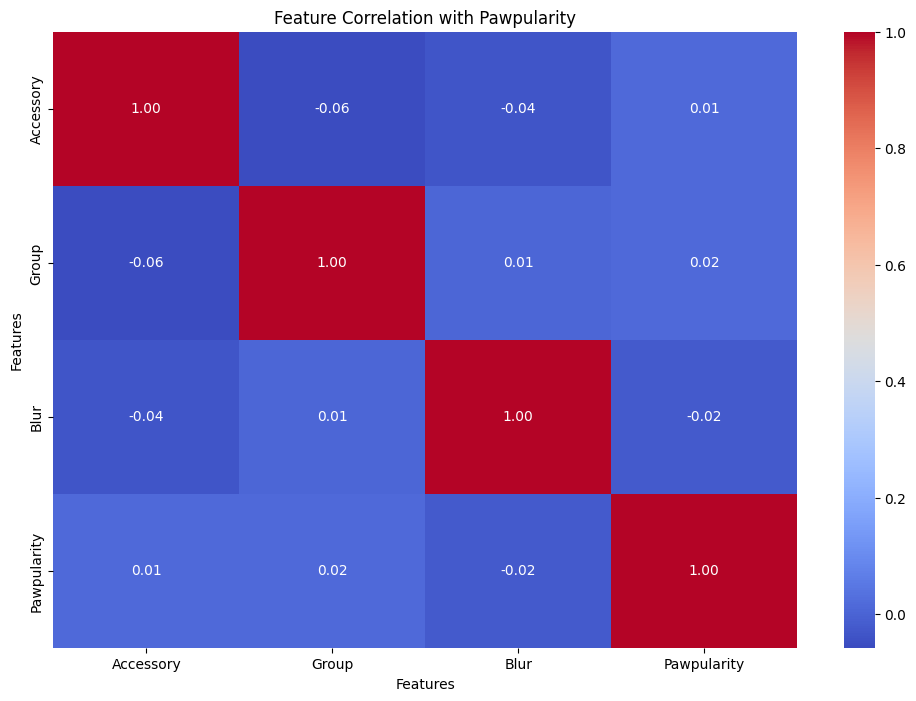

In [43]:
# heatmap
train_data_for_corr = X_train.copy()
train_data_for_corr['Pawpularity'] = y_train

correlation_matrix = train_data_for_corr.corr()

pawpularity_correlation = correlation_matrix['Pawpularity'].sort_values(ascending=False)
print(pawpularity_correlation)

correlation_matrix = train_data_for_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation with Pawpularity')
plt.xlabel('Features')
plt.ylabel('Features')


plt.show()


In [44]:
# check accuracy

# calculate r2 score
r2 = r2_score(y_test, predictions)

# calculate mean absolute error and mean squared error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R^2: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R^2: -0.48095477828405286
Mean Squared Error: 1264.2147139784058
Mean Absolute Error: 33.12765281892579


In [45]:
# print the actual and observed values
for i in range(len(y_test)):
  print( "actual=", y_test[i], " observed=", predictions[i].round(2) )

actual= 67.75  observed= 38.26
actual= 59.15  observed= 39.03
actual= 20.02  observed= 38.26
actual= 94.53  observed= 37.96
actual= 89.82  observed= 39.06
actual= 65.5  observed= 40.13
actual= 71.42  observed= 37.19
actual= 5.85  observed= 36.09


In [46]:
# Create a DataFrame with the Id from the test data and the predictions
final_df = pd.DataFrame({
    'Id': test_data['Id'],
    'Pawpularity': predictions
})

# Write the DataFrame to a CSV file
final_df.to_csv('./data/test/test2_results.csv', index=False)